In [124]:
import math
import numpy as np
np.set_printoptions(threshold=np.inf)
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import integrate

In [125]:
def JT(zeta, c):
    
    z = zeta+c**2/zeta
    
    return z

In [126]:
def Solve_m_delta(H,T):
    
    delta = math.atan(H/T*3*math.sqrt(3)/2)
    if delta<(math.pi/2):
        delta = math.pi-delta
    m = abs(T/(3*math.sqrt(3))/math.cos(delta))
    
    return delta, m

In [127]:
def BuildFoil(delta, m, l, panelnum):
    
    c = l/4
    r0 = math.sqrt(m**2+c**2-2*m*c*math.cos(delta))  
    Nr = 1
    Ngamma = panelnum*2+1
    rn = 0.8
    r = np.linspace(r0, rn, Nr)
    gamma = np.linspace(0, 2*math.pi, Ngamma)
    R, Gamma = np.meshgrid(r, gamma)
    zeta = R*np.exp(1j*Gamma)+m*np.exp(1j*delta)
    z = JT(zeta, c)
    
    return z, zeta

In [128]:
class Panel:
    def __init__(self, xa, za, xb, zb):
        
        self.xa, self.za = xa, za
        self.xb, self.zb = xb, zb      
        self.xc, self.zc = (xa+xb)/2, (za+zb)/2       
        self.length = math.sqrt((xb-xa)**2+(zb-za)**2)     
        if xb-xa <= 0.:
            self.beta = math.acos((zb-za)/self.length)
        elif xb-xa > 0.:
            self.beta = math.pi + math.acos(-(zb-za)/self.length)        
        self.alpha = self.beta+math.pi/2.0
        self.n = [ math.cos(self.beta), math.sin(self.beta)]
        self.t = [-math.sin(self.beta) ,math.cos(self.beta)]
        

In [129]:
def doublet_panel_velocity(p,x,z,kappa):

    xp =  math.sin(p.beta)*(x-p.xb) - math.cos(p.beta)*(z-p.zb)
    zp =  math.cos(p.beta)*(x-p.xb) + math.sin(p.beta)*(z-p.zb)
    
    up = -kappa/(2.0*math.pi)*(zp/(xp**2.0+zp**2.0)-zp/((xp-p.length)**2.0+zp**2.0))
    wp = kappa/(2.0*math.pi)*(xp/(xp**2.0+zp**2.0)-(xp-p.length)/((xp-p.length)**2.0+zp**2.0))
    
    u =  math.sin(p.beta)*up + math.cos(p.beta)*wp
    w = -math.cos(p.beta)*up + math.sin(p.beta)*wp
        
    return u, w

In [130]:
def NACA2510_JT(panelnum):
    
    l = 1
    T = 0.10
    H = 0.02
    delta, m = Solve_m_delta(H,T)
    z, zeta = BuildFoil(delta, m, l, panelnum)
    pxa = np.zeros(panelnum)
    pxb = np.zeros(panelnum)
    pza = np.zeros(panelnum)
    pzb = np.zeros(panelnum)
    for pn in range (int(panelnum*2+1)):
        if (pn%2 == 0) and (pn <= panelnum*2-1):
            pxa[int(pn/2)] = z[pn].real
            pza[int(pn/2)] = z[pn].imag
    for pn in range (panelnum-1):
        pxb[pn] = pxa[pn+1]
        pzb[pn] = pza[pn+1]
    pxb[panelnum-1] = pxa[0]
    pzb[panelnum-1] = pza[0]
    pza[0] = 0.0
    pzb[panelnum-2] = 0.0
    pza[panelnum-1] = 0.0
    pzb[panelnum-1] = 0.0
    upnum = int(panelnum/2.0)
    dwnum = int(panelnum/2.0)
    fsize = 8
    plt.figure(figsize=(fsize, fsize))
    plt.xlim(-0.6, 0.6)
    plt.ylim(-0.6, 0.6)
    plt.scatter(pxb,pzb,s = 20, marker = 'x', color = 'red')
    plt.scatter(pxa,pza,s = 10,color = 'blue');
    plt.grid('on')    
    
    return pxa,pxb,pza,pzb,upnum,dwnum 

A_matrix Determant: 5.41782417678e+33
X_vector [ 7.76515957  7.76360394  7.83582672  8.60886102  7.07288254  6.5162582
  6.24491989  6.09902467  6.02175492  5.98597369  5.97661171  5.98424128
  6.00223843  6.02556321  6.05023856  6.07310568  6.09168968  6.10408443
  6.10864138  6.10284057  6.08725367  6.06445086  6.03518783  6.00089716
  5.96370941  5.92641939  5.89255266  5.86652928  5.85398835  5.86243473
  5.90263599  5.99242057  6.17188624  6.59241218  8.42460036  7.93513838
  7.7770617  -0.01190213]


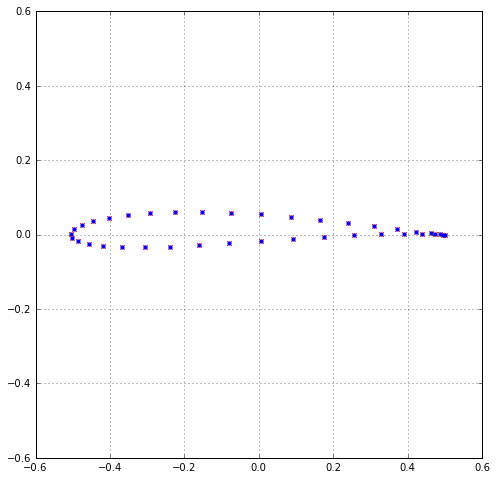

In [131]:
U_inf = 1.0
AOA = 2.0/180.0*math.pi
panelnum = 38
pxa,pxb,pza,pzb,upnum,dwnum = NACA2510_JT(panelnum)
N = 500
x0,xn = -50.0,50.0
z0,zn = -50.0,50.0
#z0_eff,zn_eff = -2.5,2.5
#x0_eff,xn_eff = -2.5,xn
#dz = (zn-z0)/N
#dx = (xn-x0)/N
#Nz0_eff = int((z0_eff-z0)/dz)
#Nzn_eff = int((zn_eff-z0)/dz)
#Nx0_eff = int((x0_eff-x0)/dx)
#Nxn_eff = int((xn_eff-x0)/dx)
#x = np.linspace(x0,xn,N)
#z = np.linspace(z0,zn,N)
#X,Z = np.meshgrid(x,z)
#u = np.ones((N, N), dtype=float)
#w = np.ones((N, N), dtype=float)
utemp1 = 0.0
wtemp1 = 0.0
#utemp = np.zeros((N, N), dtype=float)
#wtemp = np.zeros((N, N), dtype=float)
A_matrix = np.empty((panelnum,panelnum),dtype=float)
b_vector = np.zeros(panelnum,dtype=float)
x_vector = np.zeros(panelnum,dtype=float)

# Merge the Last Two Panels and Add Wake Panel
pxb[panelnum-2] = pxb[panelnum-1]
pzb[panelnum-2] = pzb[panelnum-1]
pxa[panelnum-1] = pxb[panelnum-1]
pza[panelnum-1] = pzb[panelnum-1]
pxb[panelnum-1] = xn*0.95

p = np.empty(panelnum, dtype=object)
for pn in range (panelnum):
    p[pn] = Panel(pxa[pn],pza[pn],pxb[pn],pzb[pn])
    #print(p[pn].xc,p[pn].zc)
for pn1 in range (panelnum):
    for pn2 in range (panelnum):
        utemp1,wtemp1 =  doublet_panel_velocity(p[pn2],p[pn1].xc,p[pn1].zc,1.0)
        A_matrix[pn1,pn2] = np.dot([utemp1,wtemp1],p[pn1].n)
    b_vector[pn1] = -1.0*np.dot([U_inf*np.cos(AOA),U_inf*np.sin(AOA)],p[pn1].n)
for k in range (panelnum):
    error = np.abs(A_matrix[k,k] - 2.0/(math.pi*p[k].length))
    if (error >= 0.1):
        print('Error of A diag:k,error',k,error)
    A_matrix[k,k] = 2.0/(math.pi*p[k].length)*1.001
A_matrix[panelnum-1,:] = 0.0
A_matrix[panelnum-1,0] = 1.0
A_matrix[panelnum-1,panelnum-2] = -1.0
A_matrix[panelnum-1,panelnum-1] = -1.0
print('A_matrix Determant:',np.linalg.det(A_matrix))
b_vector[panelnum-1] = 0.0
x_vector = np.linalg.solve(A_matrix,b_vector)
print('X_vector',x_vector)


In [132]:
#plt.figure(figsize = (8,8))
#plt.xlim(-1.0,1.0)
#plt.ylim(-1.0,1.0)
#u = u*U_inf*np.cos(AOA)
#w = w*U_inf*np.sin(AOA)
#iteration = 0
#for pn in range (panelnum):
#    for i in range (Nx0_eff,Nxn_eff):
#        for j in range (Nz0_eff,Nzn_eff):
#            utemp[i,j], wtemp[i,j] = doublet_panel_velocity(p[pn],X[i,j],Z[i,j],x_vector[pn])
#            iteration = iteration + 1
#    u = u+utemp
#    w = w+wtemp
#    px = np.linspace(pxa[pn],pxb[pn],200)
#    pz = np.linspace(pza[pn],pzb[pn],200)
#    plt.scatter (px,pz,color = 'red',s=0.1)
#plt.streamplot (X,Z,u,w,density = 50);

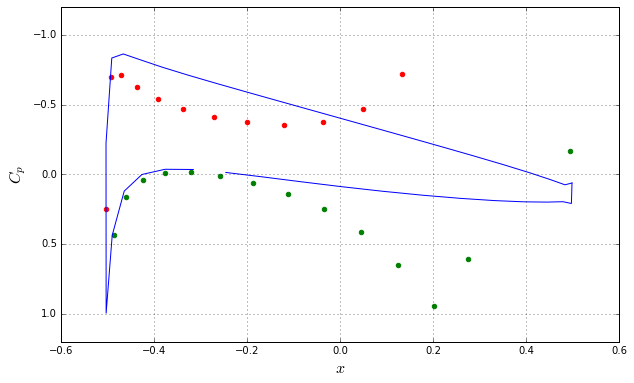

In [133]:
vt = np.zeros(panelnum,dtype=float)
vn = np.zeros(panelnum,dtype=float)
cp = np.zeros(panelnum,dtype=float)
xaxis = np.zeros(panelnum,dtype=float)
cpup = np.zeros(upnum-1)
cpdw = np.zeros(dwnum-1)
xup = np.zeros(upnum-1)
xdw = np.zeros(dwnum-1)
utemp1 = 0.0
wtemp1 = 0.0
for pn1 in range (1,panelnum-2):
    for pn2 in range (panelnum-1):
        if pn1 != pn2:
            utemp1,wtemp1 =  doublet_panel_velocity(p[pn2],p[pn1].xc,p[pn1].zc,x_vector[pn2])
            vt[pn1] = vt[pn1]+np.dot([utemp1,wtemp1],p[pn1].t)
        else:
            vt[pn1] = vt[pn1]-0.5*(x_vector[pn1+1]-x_vector[pn1-1])/\
            np.sqrt((p[pn1+1].xc-p[pn1-1].xc)**2.0+(p[pn1+1].zc-p[pn1-1].zc)**2.0)
    vt[pn1] = vt[pn1]+np.dot([U_inf*np.cos(AOA),U_inf*np.sin(AOA)],p[pn1].t)
for pn2 in range (panelnum-1):
    if pn2 != 0:
        utemp1,wtemp1 =  doublet_panel_velocity(p[pn2],p[0].xc,p[0].zc,x_vector[pn2])
        vt[0] = vt[0]+np.dot([utemp1,wtemp1],p[0].t)
    else:
        vt[0] = vt[0]-0.5*(x_vector[1]-x_vector[0])/np.sqrt((p[1].xc-p[0].xc)**2.0+(p[1].zc-p[0].zc)**2.0)
vt[0] = vt[0]+np.dot([U_inf*np.cos(AOA),U_inf*np.sin(AOA)],p[0].t)
for pn2 in range (panelnum-1):
    if pn2 != (panelnum-2):
        utemp1,wtemp1 =  doublet_panel_velocity(p[pn2],p[panelnum-2].xc,p[panelnum-2].zc,x_vector[pn2])
        vt[panelnum-2] = vt[panelnum-2]+np.dot([utemp1,wtemp1],p[panelnum-2].t)
    else:
        vt[panelnum-2] = vt[panelnum-2]-\
            0.5*(x_vector[panelnum-2]-x_vector[panelnum-3])/\
        np.sqrt((p[panelnum-2].xc-p[panelnum-3].xc)**2.0+(p[panelnum-2].zc-p[panelnum-3].zc)**2.0)
vt[panelnum-2] = vt[panelnum-2]+np.dot([U_inf*np.cos(AOA),U_inf*np.sin(AOA)],p[panelnum-2].t)
vt[panelnum-1] = np.dot([U_inf*np.cos(AOA),U_inf*np.sin(AOA)],p[panelnum-1].t)

#print ('Pressure Coeff:  p[pn].xc,p[pn].zc,vt[pn],cp[pn]')
for pn in range (panelnum):
    cp[pn] = 1.0-(vt[pn]**2.0)/(U_inf**2.0)
    xaxis[pn] = p[pn].xc
    #print ('Pressure Coeff:',p[pn].xc,p[pn].zc,vt[pn],cp[pn])
xaxis[panelnum-1] = 1.0
cp[panelnum-1] = 0.0
    
for pn in range (upnum-1):
    cpup[pn] = cp[pn]
    xup[pn] = xaxis[pn]
for pn in range (dwnum-1):
    cpdw[pn] = cp[pn+upnum]
    xdw[pn] = xaxis[pn+upnum]
plt.figure(figsize = (10,6))
plt.scatter(xup,cpup,color = 'green')
plt.scatter(xdw,cpdw,color = 'red')
plt.grid('on')
plt.gca().invert_yaxis()
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$C_p$', fontsize=16)
plt.ylim(1.2,-1.2)

# Exact Solutions:
# Define polar grid
ngr = 12;
ngtheta = panelnum

# airfoil properties
c = 1
T = 0.10
H = 0.02
a = c/4
r_s = (0.25+T/(3*math.sqrt(3)))
zeta_c = -4*a/(3*math.sqrt(3))*T + 1j*2*a*H

theta = np.radians(np.linspace(0,360,ngtheta));
r = np.linspace(r_s,2*r_s,ngr);

R, Theta = np.meshgrid(r, theta)
Zeta = R*np.exp(1j*Theta)

# flow parameters
Uinf = U_inf                                     # free stream velocity
al = AOA                                       # angle of attack
kappa = 2*math.pi*Uinf*r_s**2                  # doublet strength for circle with radius r_s
Gam = 4*math.pi*r_s*Uinf*np.sin(al+2*H)     # vortex strength

# compute the complex potential on the mesh grid and complex velocity on the surface
W = Uinf*Zeta + kappa/(2*math.pi)/Zeta + 1j*Gam/(2*math.pi)*np.log(Zeta)
w = Uinf - kappa/(2*math.pi)/Zeta[:,0]**2 + 1j*Gam/(2*math.pi)/Zeta[:,0]
Zeta = Zeta*np.exp(1j*al)

# Joukowski transformation
Z = (Zeta+zeta_c) + a**2/(Zeta+zeta_c)
w = w/(1 - a**2/(Zeta[:,0]+zeta_c)**2)
#print('Ideal Vt')
#print(np.abs(w))
cp_ex = 1 - np.abs(w)**2/Uinf**2
plt.plot(Z.real[:25,0],cp_ex[:25],'b')
plt.plot(Z.real[25:,0],cp_ex[25:],'b');

In [134]:
print('Normal Velocity Error:')
vn = np.zeros(panelnum,dtype=float)
utemp1 = 0.0
wtemp1 = 0.0
for pn1 in range (panelnum):
    for pn2 in range (panelnum):
        utemp1,wtemp1 =  doublet_panel_velocity(p[pn2],p[pn1].xc,p[pn1].zc,x_vector[pn2])
        vn[pn1] = vn[pn1]+np.dot([utemp1,wtemp1],p[pn1].n)
    vn[pn1] = vn[pn1]+np.dot([U_inf*np.cos(AOA),U_inf*np.sin(AOA)],p[pn1].n)
    if np.abs(vn[pn1])>=0.01:
        print(pn1,vn[pn1])


Normal Velocity Error:
0 -0.435467453071
1 -0.187641735018
2 -0.124543399668
3 -0.10524061534
4 -0.0724879110731
5 -0.0592600378954
6 -0.0525419910527
7 -0.0490731049787
8 -0.0476513720745
9 -0.0477694848742
10 -0.0492558142744
11 -0.0521635907155
12 -0.056767362332
13 -0.0636526583703
14 -0.0739598248744
15 -0.0899959402832
16 -0.116914846744
17 -0.167865527548
18 -0.274200101532
19 -0.339551712221
20 -0.209080935369
21 -0.133380110163
22 -0.0963412648442
23 -0.0756003066168
24 -0.0628056836189
25 -0.0544802644524
26 -0.048990355092
27 -0.0455163519856
28 -0.0436620299346
29 -0.0433048002759
30 -0.0445673045138
31 -0.0479029598722
32 -0.0544429471298
33 -0.0675936829028
34 -0.107835758282
35 -0.141929136264
36 -0.200866886151
37 -0.0350088256004
